In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [12]:
df = pd.read_csv("../nation_incremental.csv")
df["date"] = pd.to_datetime(df.date)
df.index = df.date

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2020-02-25 to 2020-03-04
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              9 non-null      datetime64[ns]
 1   hospitalized      9 non-null      int64         
 2   intensive_care    9 non-null      int64         
 3   self_quarantined  9 non-null      int64         
 4   active            9 non-null      int64         
 5   healed            9 non-null      int64         
 6   dead              9 non-null      int64         
 7   total_confirmed   9 non-null      int64         
 8   tested            9 non-null      int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 720.0 bytes


In [22]:
df = df.drop(columns='date')
df.head()

,hospitalized,intensive_care,self_quarantined,active,healed,dead,total_confirmed,tested
date,,,,,,,,
2020-02-25,109,29,137,275,1,7,283,6224
2020-02-26,19,7,84,110,2,5,117,3363
2020-02-27,120,20,63,203,42,5,250,2427
2020-02-28,97,8,128,233,1,4,238,3681
2020-02-29,56,41,131,228,4,8,240,2966


In [25]:
tested = df.tested
df = df.drop(columns='tested')

<Figure size 432x288 with 0 Axes>

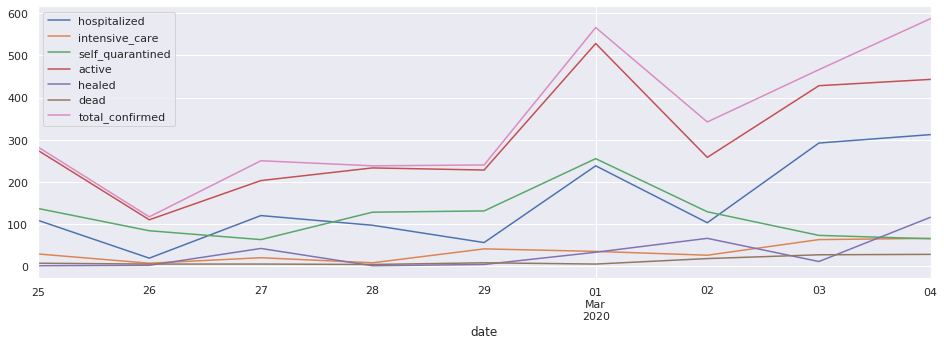

In [27]:
plt.figure()
df.plot(figsize=(16, 5))

In [28]:
df.hospitalized / tested

date
2020-02-25    0.017513
2020-02-26    0.005650
2020-02-27    0.049444
2020-02-28    0.026352
2020-02-29    0.018881
2020-03-01    0.096513
2020-03-02    0.046438
2020-03-03    0.116288
2020-03-04    0.078372
dtype: float64

In [30]:
df.active / tested

date
2020-02-25    0.044184
2020-02-26    0.032709
2020-02-27    0.083642
2020-02-28    0.063298
2020-02-29    0.076871
2020-03-01    0.214112
2020-03-02    0.116321
2020-03-03    0.170450
2020-03-04    0.111279
dtype: float64

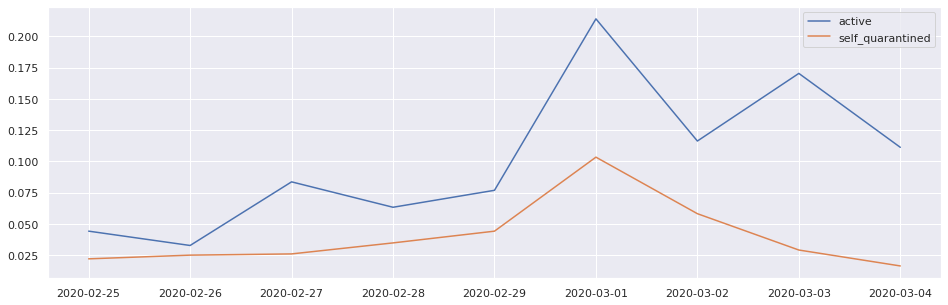

In [34]:
plt.figure(figsize=(16, 5))
plt.plot(df.index, df.active/tested, label='active')
plt.plot(df.index, df.self_quarantined/tested, label='self_quarantined')
plt.legend(loc='best')

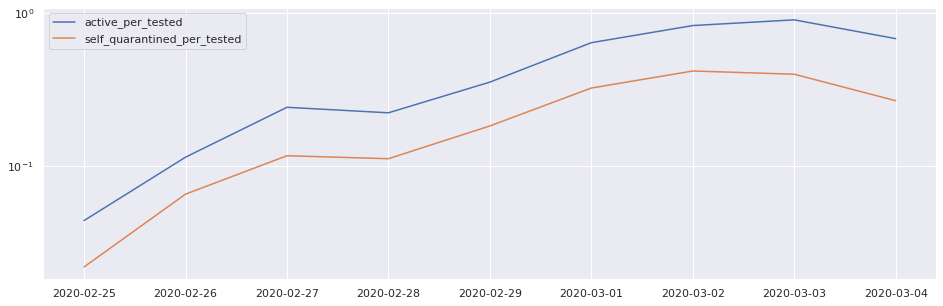

In [42]:
df_cum = df.cumsum()
plt.figure(figsize=(16, 5))
plt.plot(df_cum.index, df_cum.active/tested, label='active_per_tested')
plt.plot(df_cum.index, df_cum.self_quarantined/tested, label='self_quarantined_per_tested')

plt.yscale('log')
plt.legend(loc='best')

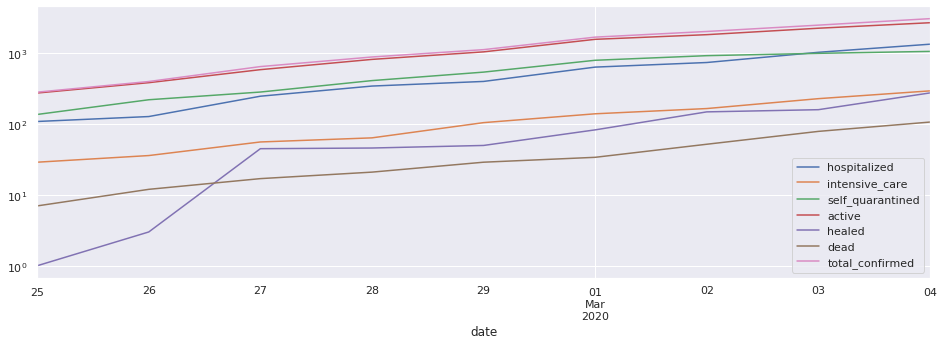

In [40]:
df_cum.plot(figsize=(16, 5), logy=True)

In [43]:
import numpy as np
from scipy.optimize import curve_fit

In [71]:
def f(x, a, b):
    return a * np.exp(b*x)

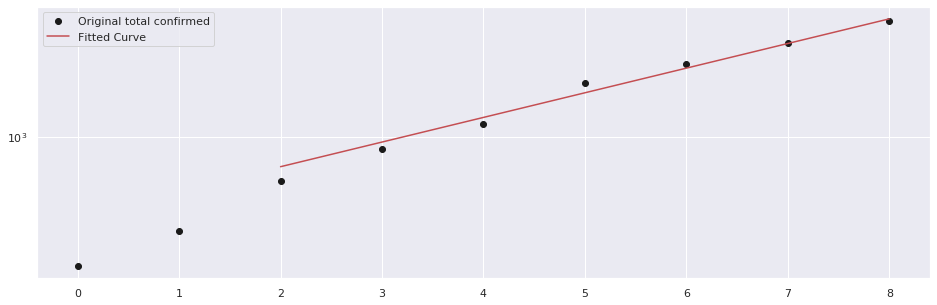

In [72]:
x = np.arange(len(df_cum.index))
popt, pcov = curve_fit(f, x[2:], df_cum.total_confirmed[2:])
plt.figure(figsize=(16, 5))
plt.plot(x, df_cum.total_confirmed, 'ko', label="Original total confirmed")
plt.plot(x[2:], f(x[2:], *popt), 'r-', label="Fitted Curve")
plt.yscale('log')
plt.legend()

In [73]:
popt

array([4.60964351e+02, 2.40634306e-01])

In [74]:
perr = np.diag(pcov)
perr

array([1.82238275e+03, 1.84811694e-04])

In [75]:
df_cum.total_confirmed

date
2020-02-25     283
2020-02-26     400
2020-02-27     650
2020-02-28     888
2020-02-29    1128
2020-03-01    1694
2020-03-02    2036
2020-03-03    2502
2020-03-04    3089
Name: total_confirmed, dtype: int64